In [1]:
'''
Author: Sameer
Date: 09/11/2018
Read Me:
1 - This code is for building a Gaussian Kernel (RBF) Support Vector Machine (SVM) and the optimization 
problem (Quadratic Programming) is solved using python cvxopt optimization toolbox.
Polynomial Kernel SVM can also be build using this code. 
2 - Input Samples variable indicates total no. of points present in both Positive and Negative Classes
Gaussian Standard Deviation is a free variable used in the Gaussian Kernel
Order is a free variable used to control the order of the polynomial used in Polynomial Kernel
Grid Size is controls the number of points to be searched on 1x1 grid to generate decision boundaries
3 - Quadratic Optimization Problem:
        QP: Minimize- 1/2 * X.T * P * X + q.T * X
        ST: G * X <= h and A * X = b
    Matrices were selected based on above descritpion. But for the detailed description go through following link:
    http://cs229.stanford.edu/notes/cs229-notes3.pdf
4 - Solution for the QP problem will not be accurate i.e. lagrange mulitpliers will not be absolute zero, so I have
made values below 1.0e-04 to be zero. For Non Support Vectors lagrange mulitpliers are zero and for Support Vector they are
greater than zero.
5 - Postive Class is also represented by C_1 and Negative Class is also represented C_-1
'''

'\nAuthor: Sameer\nDate: 09/11/2018\nRead Me:\n1 - This code is for building a Gaussian Kernel (RBF) Support Vector Machine (SVM) and the optimization \nproblem (Quadratic Programming) is solved using python cvxopt optimization toolbox.\nPolynomial Kernel SVM can also be build using this code. \n2 - Input Samples variable indicates total no. of points present in both Positive and Negative Classes\nGaussian Standard Deviation is a free variable used in the Gaussian Kernel\nOrder is a free variable used to control the order of the polynomial used in Polynomial Kernel\nGrid Size is controls the number of points to be searched on 1x1 grid to generate decision boundaries\n3 - Quadratic Optimization Problem:\n        QP: Minimize- 1/2 * X.T * P * X + q.T * X\n        ST: G * X <= h and A * X = b\n    Matrices were selected based on above descritpion. But for the detailed description go through following link:\n    http://cs229.stanford.edu/notes/cs229-notes3.pdf\n4 - Solution for the QP prob

In [2]:
# Import Required Libraries
import numpy
import matplotlib.pyplot as plt
import cvxopt

In [3]:
# Parameters
Input_Samples = 100
Gaussian_Std_Deviation = 0.5 
Order = 5
grid_size = 500

In [4]:
# Check if data exists. If yes load it otherwise create new data and store it in text file
if numpy.DataSource().exists('InputPattern.txt'):
    X = numpy.loadtxt('InputPattern.txt')
else:
    X = numpy.random.uniform(0, 1, (Input_Samples, 2))
    numpy.savetxt('InputPattern.txt', X)

In [5]:
# Create Desired Classification based on some conditions
# Which will give a circle and sine wave boundary and points lying inside them will be positive class, egative otherwise
D = numpy.array([])
Pos_Class = numpy.array([[0, 0]])
Neg_Class = numpy.array([[0, 0]])
for i in range(0, Input_Samples):
    if X[i, 1] < 0.2 * numpy.sin(10 * X[i, 0]) + 0.3 or numpy.square(X[i, 0] - 0.5) + numpy.square(X[i, 1] - 0.8) < numpy.square(0.15):
        D = numpy.concatenate((D, [1]), axis=0)
        Pos_Class = numpy.concatenate((Pos_Class, [X[i]]), axis=0)
    else:
        D = numpy.concatenate((D, [-1]), axis=0)
        Neg_Class = numpy.concatenate((Neg_Class, [X[i]]), axis=0)

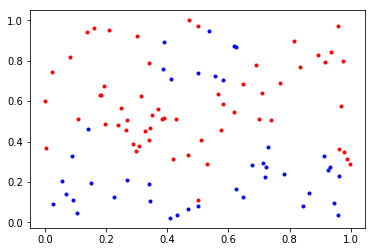

In [6]:
# Plot Results
plt.plot(Pos_Class[1:, 0], Pos_Class[1:, 1], 'b.', label=r'Class $C_1$')
plt.plot(Neg_Class[1:, 0], Neg_Class[1:, 1], 'r.', label=r'Class $C_{-1}$')
plt.show()

In [7]:
# Required Functions
def Gaussian_Kernel(X1, X2, sigma):
    return numpy.exp(-numpy.square(numpy.linalg.norm(X1 - X2))/(2 * numpy.square(sigma)))
def Polynomial_Kernel(X1, X2, order):
    return (1 + numpy.dot(X1, X2))**order

In [8]:
# Optimization Problem - Quadratic Programming
P = numpy.empty([Input_Samples, Input_Samples])
for i in range(0, Input_Samples):
    for j in range(0, Input_Samples):
        P[i, j] = D[i] * D[j] * Gaussian_Kernel(X[i], X[j], Gaussian_Std_Deviation)
#         P[i, j] = D[i] * D[j] * Polynomial_Kernel(X[i], X[j], Order)
# Refer Documentation for Cvxopt Quadratic Programming for the meaning of the matrices
P = cvxopt.matrix(P)        
q = cvxopt.matrix(numpy.ones((Input_Samples), dtype='double') * -1)
G = cvxopt.matrix(numpy.diag(numpy.ones((Input_Samples), dtype='double') * -1))
h = cvxopt.matrix(numpy.zeros(Input_Samples))
A = cvxopt.matrix(D, (1, Input_Samples))
b = cvxopt.matrix(0.0)
sol = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -5.6916e+01 -1.6740e+02  1e+02  9e-16  3e+00
 1: -1.0023e+02 -1.4141e+02  4e+01  3e-15  1e+00
 2: -3.4382e+02 -3.9427e+02  5e+01  3e-14  1e+00
 3: -5.2478e+02 -5.9208e+02  7e+01  2e-14  1e+00
 4: -1.8508e+03 -2.0284e+03  2e+02  8e-14  1e+00
 5: -4.2056e+03 -4.5401e+03  3e+02  2e-13  1e+00
 6: -1.0996e+04 -1.1943e+04  9e+02  5e-13  1e+00
 7: -2.5028e+04 -2.8114e+04  3e+03  3e-12  1e+00
 8: -5.1677e+04 -6.1449e+04  1e+04  4e-12  9e-01
 9: -8.8447e+04 -1.0922e+05  2e+04  5e-12  6e-01
10: -1.0995e+05 -1.2477e+05  1e+04  2e-11  2e-01
11: -1.1231e+05 -1.1308e+05  8e+02  3e-11  7e-03
12: -1.1239e+05 -1.1241e+05  2e+01  1e-11  1e-04
13: -1.1240e+05 -1.1240e+05  3e-01  1e-11  1e-06
14: -1.1240e+05 -1.1240e+05  3e-03  2e-11  1e-08
Optimal solution found.


In [9]:
# Solution:
Alpha_Prime = numpy.ravel(numpy.array(sol['x']))
Alpha = numpy.array([0 if i < 1.0e-04 else i for i in Alpha_Prime]) # Making alpha's perfectly zeroes
SV_Pos_Class = numpy.array([[0, 0]]) # Support Vector for Positive Class
SV_Neg_Class = numpy.array([[0, 0]]) # Support Vecotr for Negative Class
SV_Label = numpy.array([]) # Labels for all Support Vectors, to decrease for loop time execution. 
for i in range(0, Input_Samples):
    if Alpha[i] != 0:
        if D[i] == 1:
            SV_Pos_Class = numpy.concatenate((SV_Pos_Class, [X[i]]), axis=0)
            SV_Label = numpy.concatenate((SV_Label, [i]), axis=0)
        else:
            SV_Neg_Class = numpy.concatenate((SV_Neg_Class, [X[i]]), axis=0)
            SV_Label = numpy.concatenate((SV_Label, [i]), axis=0)
for k in range(0, Input_Samples):
    if Alpha[k] != 0:
        W = 0
        for i in numpy.nditer(SV_Label):
            W = W + Alpha[int(i)] * D[int(i)] * Gaussian_Kernel(X[int(i)], X[k], Gaussian_Std_Deviation)
#             W = W + Alpha[int(i)] * D[int(i)] * Polynomial_Kernel(X[int(i)], X[k], Order)
        Theta = D[k] - W
        break

In [10]:
# Generate Boundary
x_points = numpy.linspace(0.0, 1.0, grid_size)
y_points = numpy.linspace(0.0, 1.0, grid_size)
H = numpy.array([[0, 0]]) # Decision Boundary
H_Plus = numpy.array([[0, 0]]) # Postivie Gutter
H_Minus = numpy.array([[0, 0]]) # Negative Gutter
for i in range(0, grid_size):
    for j in range(0, grid_size):
        Discriminant = 0
        temp = numpy.array([x_points[i], y_points[j]])
        for k in numpy.nditer(SV_Label):
            Discriminant = Discriminant + Alpha[int(k)] * D[int(k)] * Gaussian_Kernel(X[int(k)], temp, Gaussian_Std_Deviation)
#             Discriminant = Discriminant + Alpha[int(k)] * D[int(k)] * Polynomial_Kernel(X[int(k)], temp, Order)
        Discriminant = Discriminant + Theta
        if -0.1 < Discriminant < 0.1:
            H = numpy.concatenate((H, [temp]), axis=0)
        elif -1.1 < Discriminant < -0.9:
            H_Minus = numpy.concatenate((H_Minus, [temp]), axis=0)
        elif 0.9 < Discriminant < 1.1:
            H_Plus = numpy.concatenate((H_Plus, [temp]), axis=0)

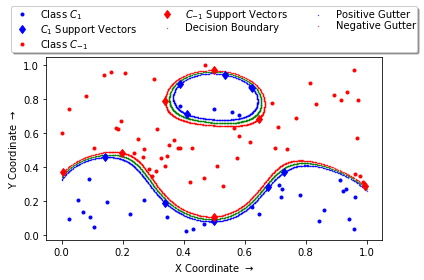

In [11]:
# Plot Results
plt.plot(Pos_Class[1:, 0], Pos_Class[1:, 1], 'b.', label=r'Class $C_1$')
plt.plot(SV_Pos_Class[1:, 0], SV_Pos_Class[1:, 1], 'bd', label=r'$C_1$ Support Vectors')
plt.plot(Neg_Class[1:, 0], Neg_Class[1:, 1], 'r.', label=r'Class $C_{-1}$')
plt.plot(SV_Neg_Class[1:, 0], SV_Neg_Class[1:, 1], 'rd', label=r'$C_{-1}$ Support Vectors')
plt.scatter(H[1:, 0], H[1:, 1], s=0.1, c='g', label='Decision Boundary')
plt.scatter(H_Plus[1:, 0], H_Plus[1:, 1], s=0.1, c='b', label='Positive Gutter')
plt.scatter(H_Minus[1:, 0], H_Minus[1:, 1], s=0.1, c='r', label='Negative Gutter')
plt.xlabel(r'X Coordinate $\rightarrow$')
plt.ylabel(r'Y Coordinate $\rightarrow$')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True, ncol=3, borderpad=0.1, labelspacing=0.1)
plt.tight_layout()
plt.savefig('Results.pdf')
plt.show()